# DSE Visualization

## Libraries and functions

In [1]:
import pandas as pd

In [2]:
from visualization_utils import display_interactive_table

from visualization_utils import plot_area_latency_vs_reusefactor
from visualization_utils import plot_interactive_area_latency_vs_reusefactor
from visualization_utils import plot_multiple_area_latency_vs_reusefactor

from visualization_utils import plot_area_vs_latency
from visualization_utils import plot_interactive_area_vs_latency
from visualization_utils import plot_multiple_area_vs_latency

from visualization_utils import plot_runtime_vs_reusefactor
from visualization_utils import plot_interactive_runtime_vs_reusefactor
from visualization_utils import plot_multiple_runtime_vs_reusefactor

## Load data

In [3]:
#!wget https://fastmachinelearning.org/hls4ml/_images/hls4ml_logo.png

In [4]:
dse_filename = 'dse.csv'
df = pd.read_csv(dse_filename)
print(f'Rows: {df.shape[0]}')

Rows: 233


## Show data

In [5]:
entry_columns = list(df.columns)
print(entry_columns)

['Layer', 'IOType', 'Strategy', 'Inputs', 'Outputs', 'ReuseFactor', 'Precision', 'AreaHLS', 'LatencyHLS', 'IIHLS', 'AreaSYN', 'RuntimeHLS', 'RuntimeSYN']


In [6]:
display(df)

,Layer,IOType,Strategy,Inputs,Outputs,ReuseFactor,Precision,AreaHLS,LatencyHLS,IIHLS,AreaSYN,RuntimeHLS,RuntimeSYN
0,dense,io_parallel,Latency,4,4,1,"ac_fixed<16,6,true>",5053.1,1,4,4521.734,20,45
1,dense,io_parallel,Latency,4,4,2,"ac_fixed<16,6,true>",6759.2,4,7,6754.538,75,46
2,dense,io_parallel,Latency,4,4,3,"ac_fixed<16,6,true>",5376.2,11,14,5313.616,38,37
3,dense,io_parallel,Latency,4,4,4,"ac_fixed<16,6,true>",5268.1,16,19,5726.448,18,34
4,dense,io_parallel,Resource,4,4,1,"ac_fixed<16,6,true>",5295.8,6,8,5054.798,21,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,dense,io_stream,Resource,4,4,12,"ac_fixed<16,6,true>",4582.3,8,8,3545.514,13,32
229,dense,io_stream,Resource,4,4,13,"ac_fixed<16,6,true>",3457.6,16,16,2819.600,13,27
230,dense,io_stream,Resource,4,4,14,"ac_fixed<16,6,true>",3457.6,16,16,2819.600,13,28
231,dense,io_stream,Resource,4,4,15,"ac_fixed<16,6,true>",3457.6,16,16,2819.600,13,27


### List failed synthesis

In [7]:
selected_rows = df[(df['AreaHLS'] == 0) | (df['AreaSYN'] == 0)]

In [8]:
print('Failed synthesis: ', selected_rows.shape[0])

Failed synthesis:  0


In [9]:
display(selected_rows)

,Layer,IOType,Strategy,Inputs,Outputs,ReuseFactor,Precision,AreaHLS,LatencyHLS,IIHLS,AreaSYN,RuntimeHLS,RuntimeSYN


### Interactive

In [10]:
display_interactive_table(df)

GridBox(children=(SelectMultiple(description='Layer:', index=(0,), options=('dense',), value=('dense',)), Sele…

Output()

## Area and Latency vs Reuse Factor

### Interactive

In [11]:
plot_interactive_area_latency_vs_reusefactor(data=df)

GridBox(children=(Dropdown(description='Inputs', options=(4, 8, 16, 32), value=4), Dropdown(description='Outpu…

Output()

### Multiple quadrants

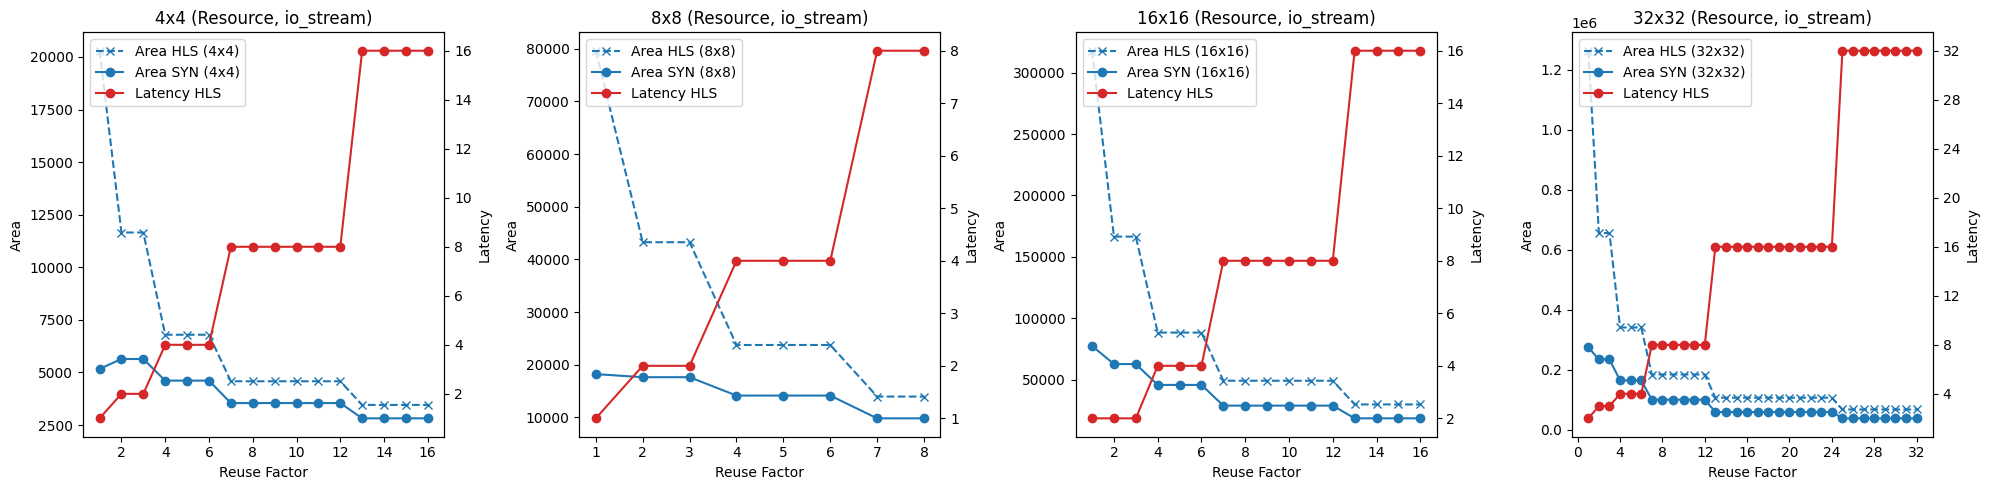

In [12]:
quadrant_pairs = [(4, 4), (8, 8), (16, 16), (32, 32)]
SHOW_AREA_HLS=True
SHOW_AREA_SYN=True
SHOW_LATENCY=True
SHOW_RF1=True
SHOW_VERTICAL=False
STRATEGY='Resource' # 'Resource', 'Latency'
IOTYPE='io_stream' # 'io_stream', 'io_parallel'

plot_multiple_area_latency_vs_reusefactor(df, quadrant_pairs,
                                          strategy=STRATEGY,
                                          iotype=IOTYPE,
                                          vertical=SHOW_VERTICAL,
                                          show_area_hls=SHOW_AREA_HLS,
                                          show_area_syn=SHOW_AREA_SYN,
                                          show_latency=SHOW_LATENCY,
                                          show_rf1=SHOW_RF1)

## Area vs Latency

### Interactive

In [13]:
plot_interactive_area_vs_latency(data=df)

GridBox(children=(Dropdown(description='Inputs', options=(4, 8, 16, 32), value=4), Dropdown(description='Outpu…

Output()

### Multiple quadrants

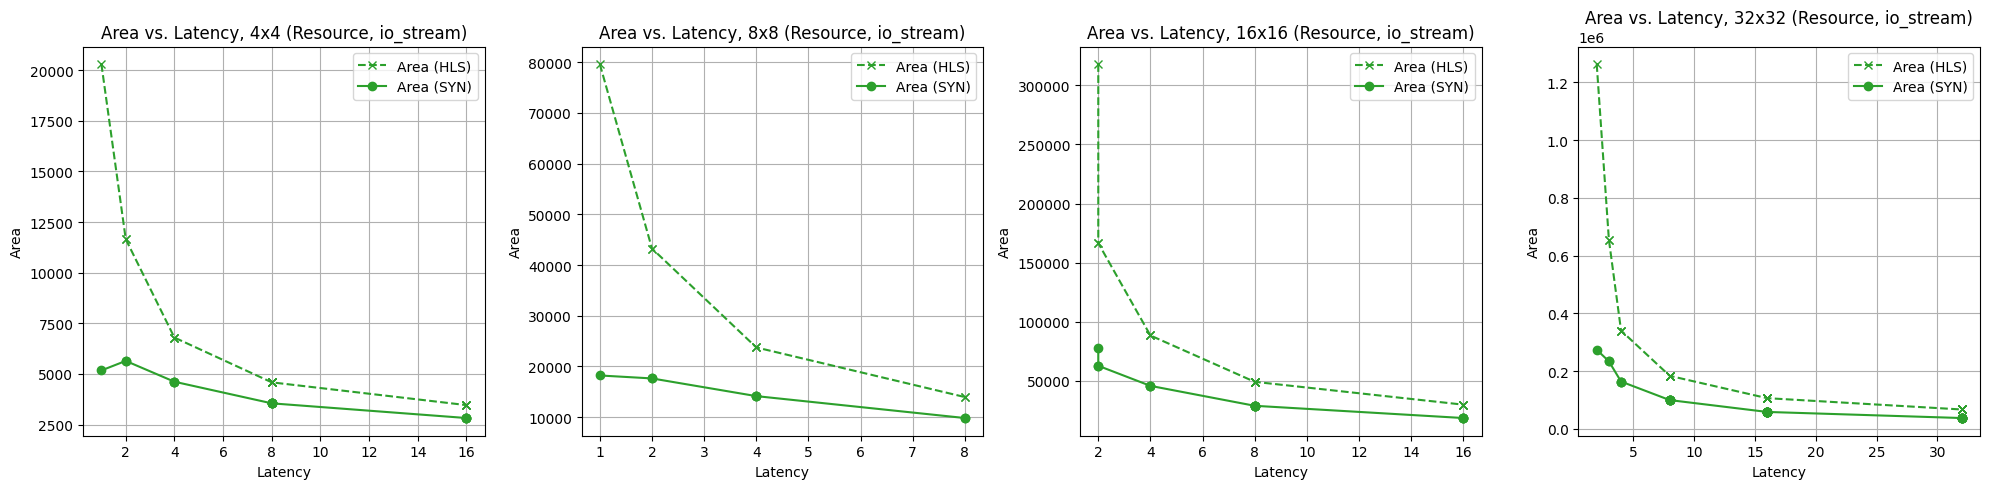

In [20]:
quadrant_pairs = [(4, 4), (8, 8), (16, 16), (32, 32)]
SHOW_AREA_HLS=True
SHOW_AREA_SYN=True
SHOW_LATENCY=True
SHOW_RF1=True
SHOW_VERTICAL=False
STRATEGY='Resource' # 'Resource', 'Latency'
IOTYPE='io_stream' # 'io_stream', 'io_parallel'

plot_multiple_area_vs_latency(df, quadrant_pairs,
                              strategy=STRATEGY,
                              iotype=IOTYPE,
                              vertical=SHOW_VERTICAL,
                              show_area_hls=SHOW_AREA_HLS,
                              show_area_syn=SHOW_AREA_SYN,
                              show_rf1=SHOW_RF1)

## Runtime

### Total

In [15]:
def convert_seconds_to_hms(seconds):
    hours = seconds // 3600
    remaining_seconds = seconds % 3600
    minutes = remaining_seconds // 60
    seconds = remaining_seconds % 60
    return f'{hours}h:{minutes}m:{seconds}s'

In [16]:
total_runtime_hls = df['RuntimeHLS'].sum()
total_runtime_syn = df['RuntimeSYN'].sum()

print(f'Total runtime for Catapult HLS: {total_runtime_hls:10d} seconds ({convert_seconds_to_hms(total_runtime_hls)})')
print(f'Total runtime for RTLCompiler : {total_runtime_syn:10d} seconds ({convert_seconds_to_hms(total_runtime_syn)})')


Total runtime for Catapult HLS:      83641 seconds (23h:14m:1s)
Total runtime for RTLCompiler :     133023 seconds (36h:57m:3s)


### Runtime vs Reuse Factor

#### Interactive

In [17]:
plot_interactive_runtime_vs_reusefactor(df)

Output()

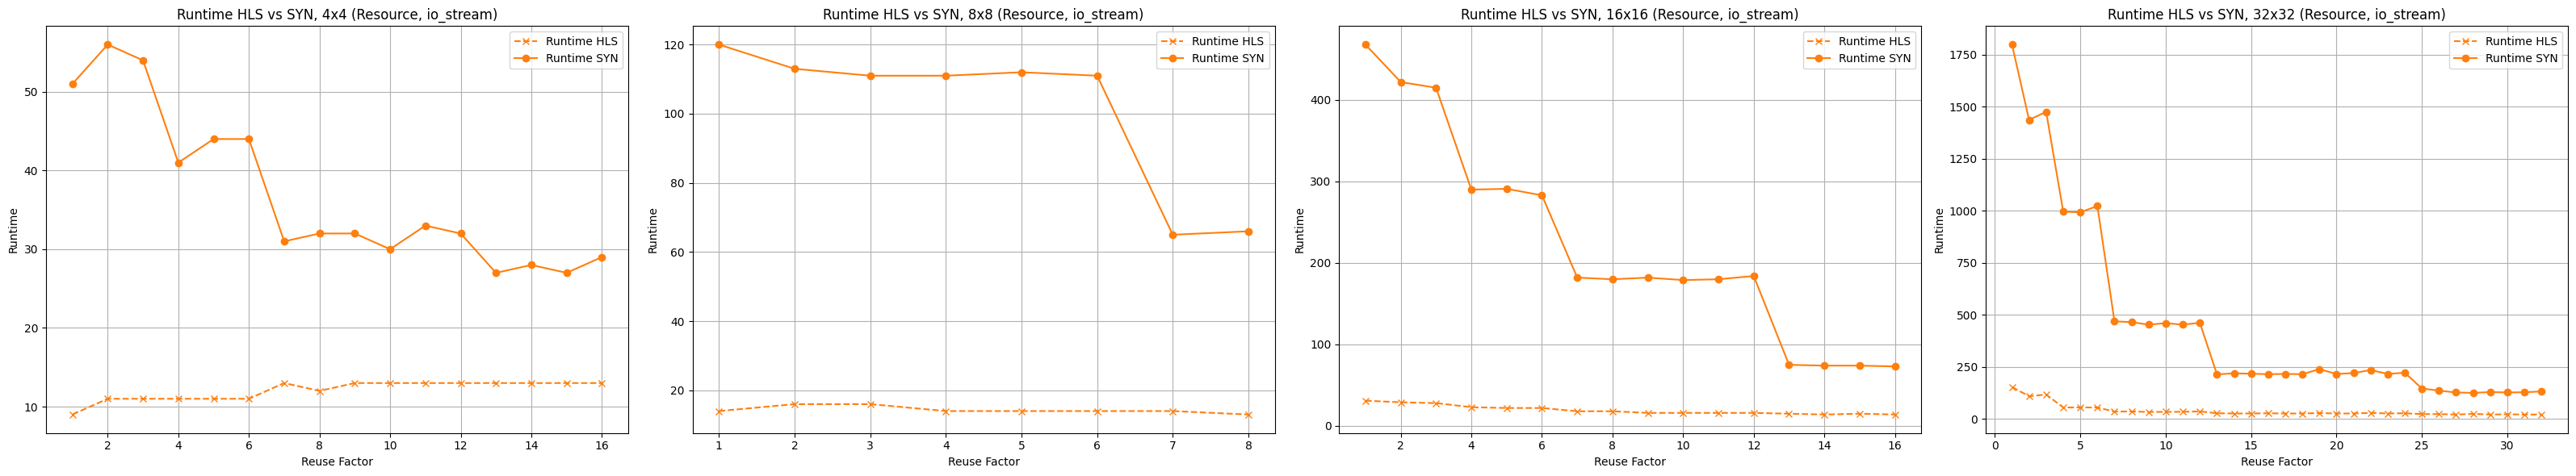

In [18]:
quadrant_pairs = [(4, 4), (8, 8), (16, 16), (32, 32)]
SHOW_RUNTIME_HLS=True
SHOW_RUNTIME_SYN=True
SHOW_RF1=True
SHOW_VERTICAL=False
STRATEGY='Resource' # 'Resource', 'Latency'
IOTYPE='io_stream' # 'io_stream', 'io_parallel'

plot_multiple_runtime_vs_reusefactor(df, quadrant_pairs,
                            strategy=STRATEGY,
                            iotype=IOTYPE,
                            vertical=SHOW_VERTICAL,
                            show_runtime_hls=SHOW_RUNTIME_HLS,
                            show_runtime_syn=SHOW_RUNTIME_SYN,
                            show_rf1=SHOW_RF1)

In [19]:
# Calculate the correlation coefficient between Area and Reuse Factor
selected_rows = df[(df['Inputs'] == 4) & (df['Outputs'] == 4)]
correlation_coefficient = selected_rows['AreaHLS'].corr(selected_rows['ReuseFactor'])
print(correlation_coefficient)

-0.5522541723879111
